In [30]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import datasets, layers, models
import numpy as np

In [3]:
Cpus = tf.config.experimental.list_physical_devices("CPU")

In [4]:
Cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
# Prevents OOM errors and limits the growth of memory occupied in the main memory.

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , True)

In [6]:
import cv2
import imghdr

C:\Users\haris\AppData\Local\Temp\ipykernel_12608\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [12]:
data_dir = "Benign_Malware"

In [14]:
os.listdir(os.path.join(data_dir , 'Dogs'))

['phoenix2x-1635969740513.min.png',
 'th (1).jpeg',
 'th (10).jpeg',
 'th (100).jpeg',
 'th (11).jpeg',
 'th (12).jpeg',
 'th (13).jpeg',
 'th (14).jpeg',
 'th (15).jpeg',
 'th (16).jpeg',
 'th (17).jpeg',
 'th (18).jpeg',
 'th (19).jpeg',
 'th (2).jpeg',
 'th (20).jpeg',
 'th (21).jpeg',
 'th (22).jpeg',
 'th (23).jpeg',
 'th (24).jpeg',
 'th (25).jpeg',
 'th (26).jpeg',
 'th (27).jpeg',
 'th (28).jpeg',
 'th (29).jpeg',
 'th (3).jpeg',
 'th (30).jpeg',
 'th (31).jpeg',
 'th (32).jpeg',
 'th (33).jpeg',
 'th (34).jpeg',
 'th (35).jpeg',
 'th (36).jpeg',
 'th (37).jpeg',
 'th (38).jpeg',
 'th (39).jpeg',
 'th (4).jpeg',
 'th (40).jpeg',
 'th (41).jpeg',
 'th (42).jpeg',
 'th (43).jpeg',
 'th (44).jpeg',
 'th (45).jpeg',
 'th (46).jpeg',
 'th (47).jpeg',
 'th (48).jpeg',
 'th (49).jpeg',
 'th (5).jpeg',
 'th (50).jpeg',
 'th (51).jpeg',
 'th (52).jpeg',
 'th (53).jpeg',
 'th (54).jpeg',
 'th (55).jpeg',
 'th (56).jpeg',
 'th (57).jpeg',
 'th (58).jpeg',
 'th (59).jpeg',
 'th (6).jpeg',


In [8]:
image_exts = ['jpeg' , 'jpg' , 'bmp' , 'png']

In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir , image_class)):
        image_path = os.path.join(data_dir , image_class , image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [22]:
img = cv2.imread(os.path.join('Benign_Malware' , 'Dogs' , 'th (21).jpeg'))

In [23]:
img # Prints the image matrix.

array([[[251, 223, 192],
        [247, 219, 188],
        [244, 216, 185],
        ...,
        [172, 161, 147],
        [178, 165, 151],
        [183, 168, 152]],

       [[248, 220, 189],
        [245, 217, 186],
        [241, 213, 182],
        ...,
        [172, 161, 147],
        [179, 166, 150],
        [184, 170, 152]],

       [[245, 217, 186],
        [242, 214, 183],
        [238, 210, 179],
        ...,
        [174, 163, 149],
        [181, 169, 151],
        [186, 172, 153]],

       ...,

       [[237, 231, 226],
        [237, 231, 226],
        [236, 230, 225],
        ...,
        [227, 215, 209],
        [229, 217, 211],
        [231, 219, 213]],

       [[240, 234, 229],
        [239, 233, 228],
        [238, 232, 227],
        ...,
        [235, 223, 217],
        [237, 225, 219],
        [238, 226, 220]],

       [[242, 236, 231],
        [241, 235, 230],
        [240, 234, 229],
        ...,
        [236, 224, 218],
        [237, 225, 219],
        [239, 227, 221]]

In [24]:
img.shape

(180, 320, 3)

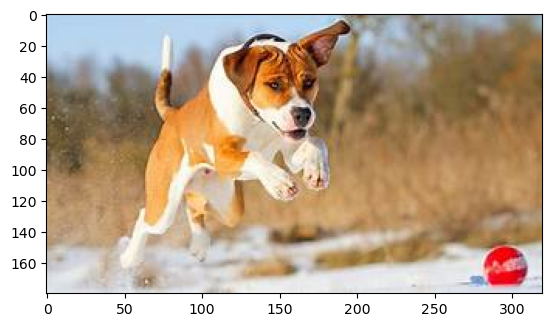

In [29]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
data = tf.keras.utils.image_dataset_from_directory('Benign_Malware')

Found 503 files belonging to 2 classes.


In [32]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [34]:
data_iterator = data.as_numpy_iterator()

In [48]:
batch = data_iterator.next()

In [42]:
data_iterator , batch[0].shape

(NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001C3A22D3D10>),
 (32, 256, 256, 3))

In [49]:
batch[1]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0])

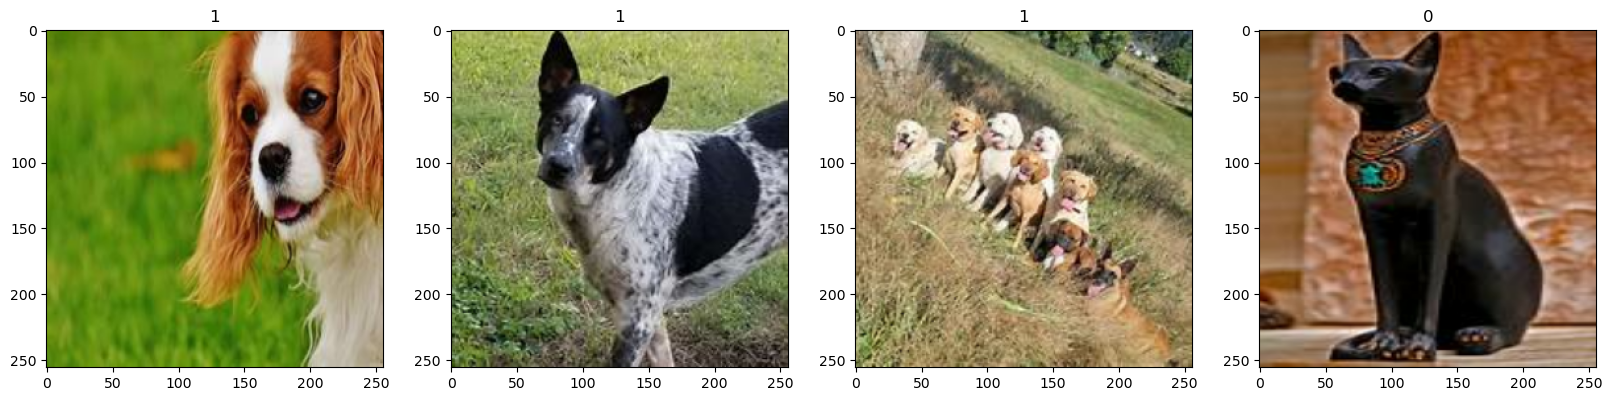

In [80]:
fig , ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Here, Dog -> 1 & Cat -> 0.

In [57]:
scaled = batch[0]/255

In [58]:
data = data.map(lambda x,y : (x/255 , y))

In [66]:
data.as_numpy_iterator().next()[0].min()

0.0

In [147]:
16*0.7

11.2

In [146]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1)
train_size

11

In [76]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [82]:
model = Sequential()

In [83]:
model.add(Conv2D(16 , (3,3) , 1 , activation='relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3) , 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3) , 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256 , activation='relu'))
model.add(Dense(1 , activation='sigmoid'))


C:\Users\haris\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile('adam' , loss = tf.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [120]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,162,949 (84.54 MB)

 Trainable params: 7,387,649 (28.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,775,300 (56.36 MB)

In [88]:
logdir = 'Logs'

In [89]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [90]:
hist = model.fit(train , epochs = 20 , validation_data=val , callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 328ms/step - accuracy: 0.5282 - loss: 1.8950 - val_accuracy: 0.5078 - val_loss: 0.6926
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.5932 - loss: 0.6858 - val_accuracy: 0.5391 - val_loss: 0.6814
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.4882 - loss: 0.6885 - val_accuracy: 0.5859 - val_loss: 0.6490
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.5610 - loss: 0.6718 - val_accuracy: 0.7109 - val_loss: 0.6576
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.6123 - loss: 0.6573 - val_accuracy: 0.7734 - val_loss: 0.6138
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - accuracy: 0.6883 - loss: 0.6158 - val_accuracy: 0.7734 - val_loss: 0.5484
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.7501 - loss: 0.5466 - val_accuracy: 0.8125 - val_loss: 0.5039
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.8353 - loss: 0.4632 - val_accuracy: 0.

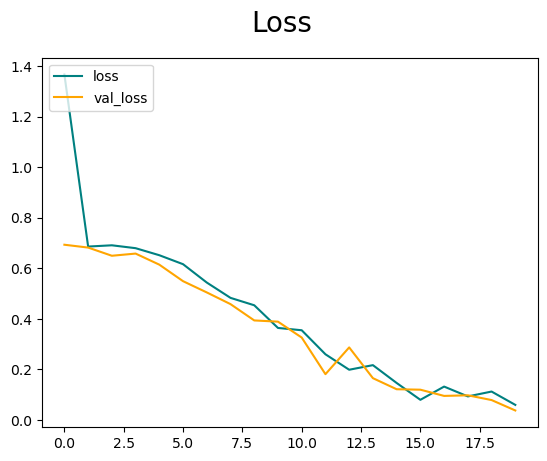

In [91]:
fig = plt.figure()
plt.plot(hist.history['loss'] , color = 'teal' , label = 'loss')
plt.plot(hist.history['val_loss'] , color = 'orange' , label = 'val_loss')
fig.suptitle('Loss' , fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

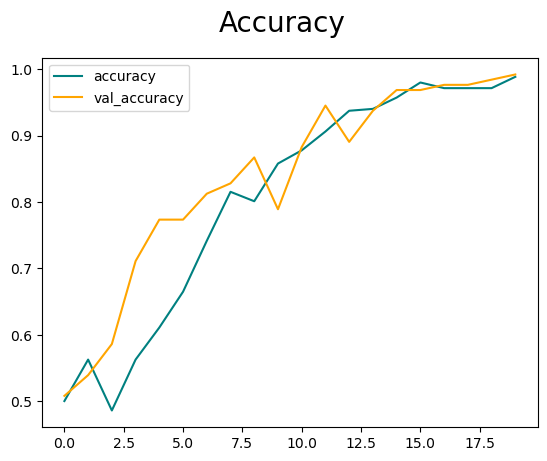

In [92]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color = 'teal' , label = 'accuracy')
plt.plot(hist.history['val_accuracy'] , color = 'orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [93]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [94]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [95]:
for batch in test.as_numpy_iterator():
    X , y = batch
    yhat = model.predict(X)
    pre.update_state(y , yhat)
    re.update_state(y , yhat)
    acc.update_state(y , yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


In [97]:
print(pre.result() , re.result() , acc.result())

tf.Tensor(0.93333334, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.95652175, shape=(), dtype=float32)


In [98]:
import cv2

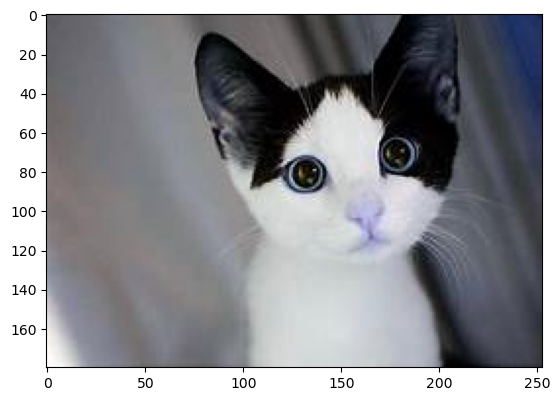

In [148]:
# TESTING

img = cv2.imread("Malware_Test.jpeg")
plt.imshow(img)
plt.show()


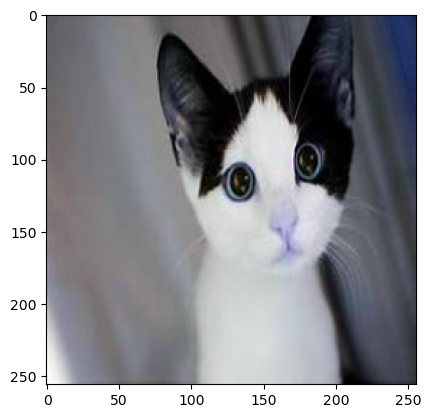

In [149]:
resize = tf.image.resize(img , (256 , 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [150]:
np.expand_dims(resize , 0).shape

(1, 256, 256, 3)

In [151]:
yhat = model.predict(np.expand_dims(resize/255 , 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [152]:
yhat

array([[0.01917361]], dtype=float32)

In [153]:
if(yhat > 0.5):
    print("It is a dog, so the software is benign! Noice :D")
else:
    print("It is a cat, so the software is malicious. Not Good :(")


It is a cat, so the software is malicious. Not Good :(
